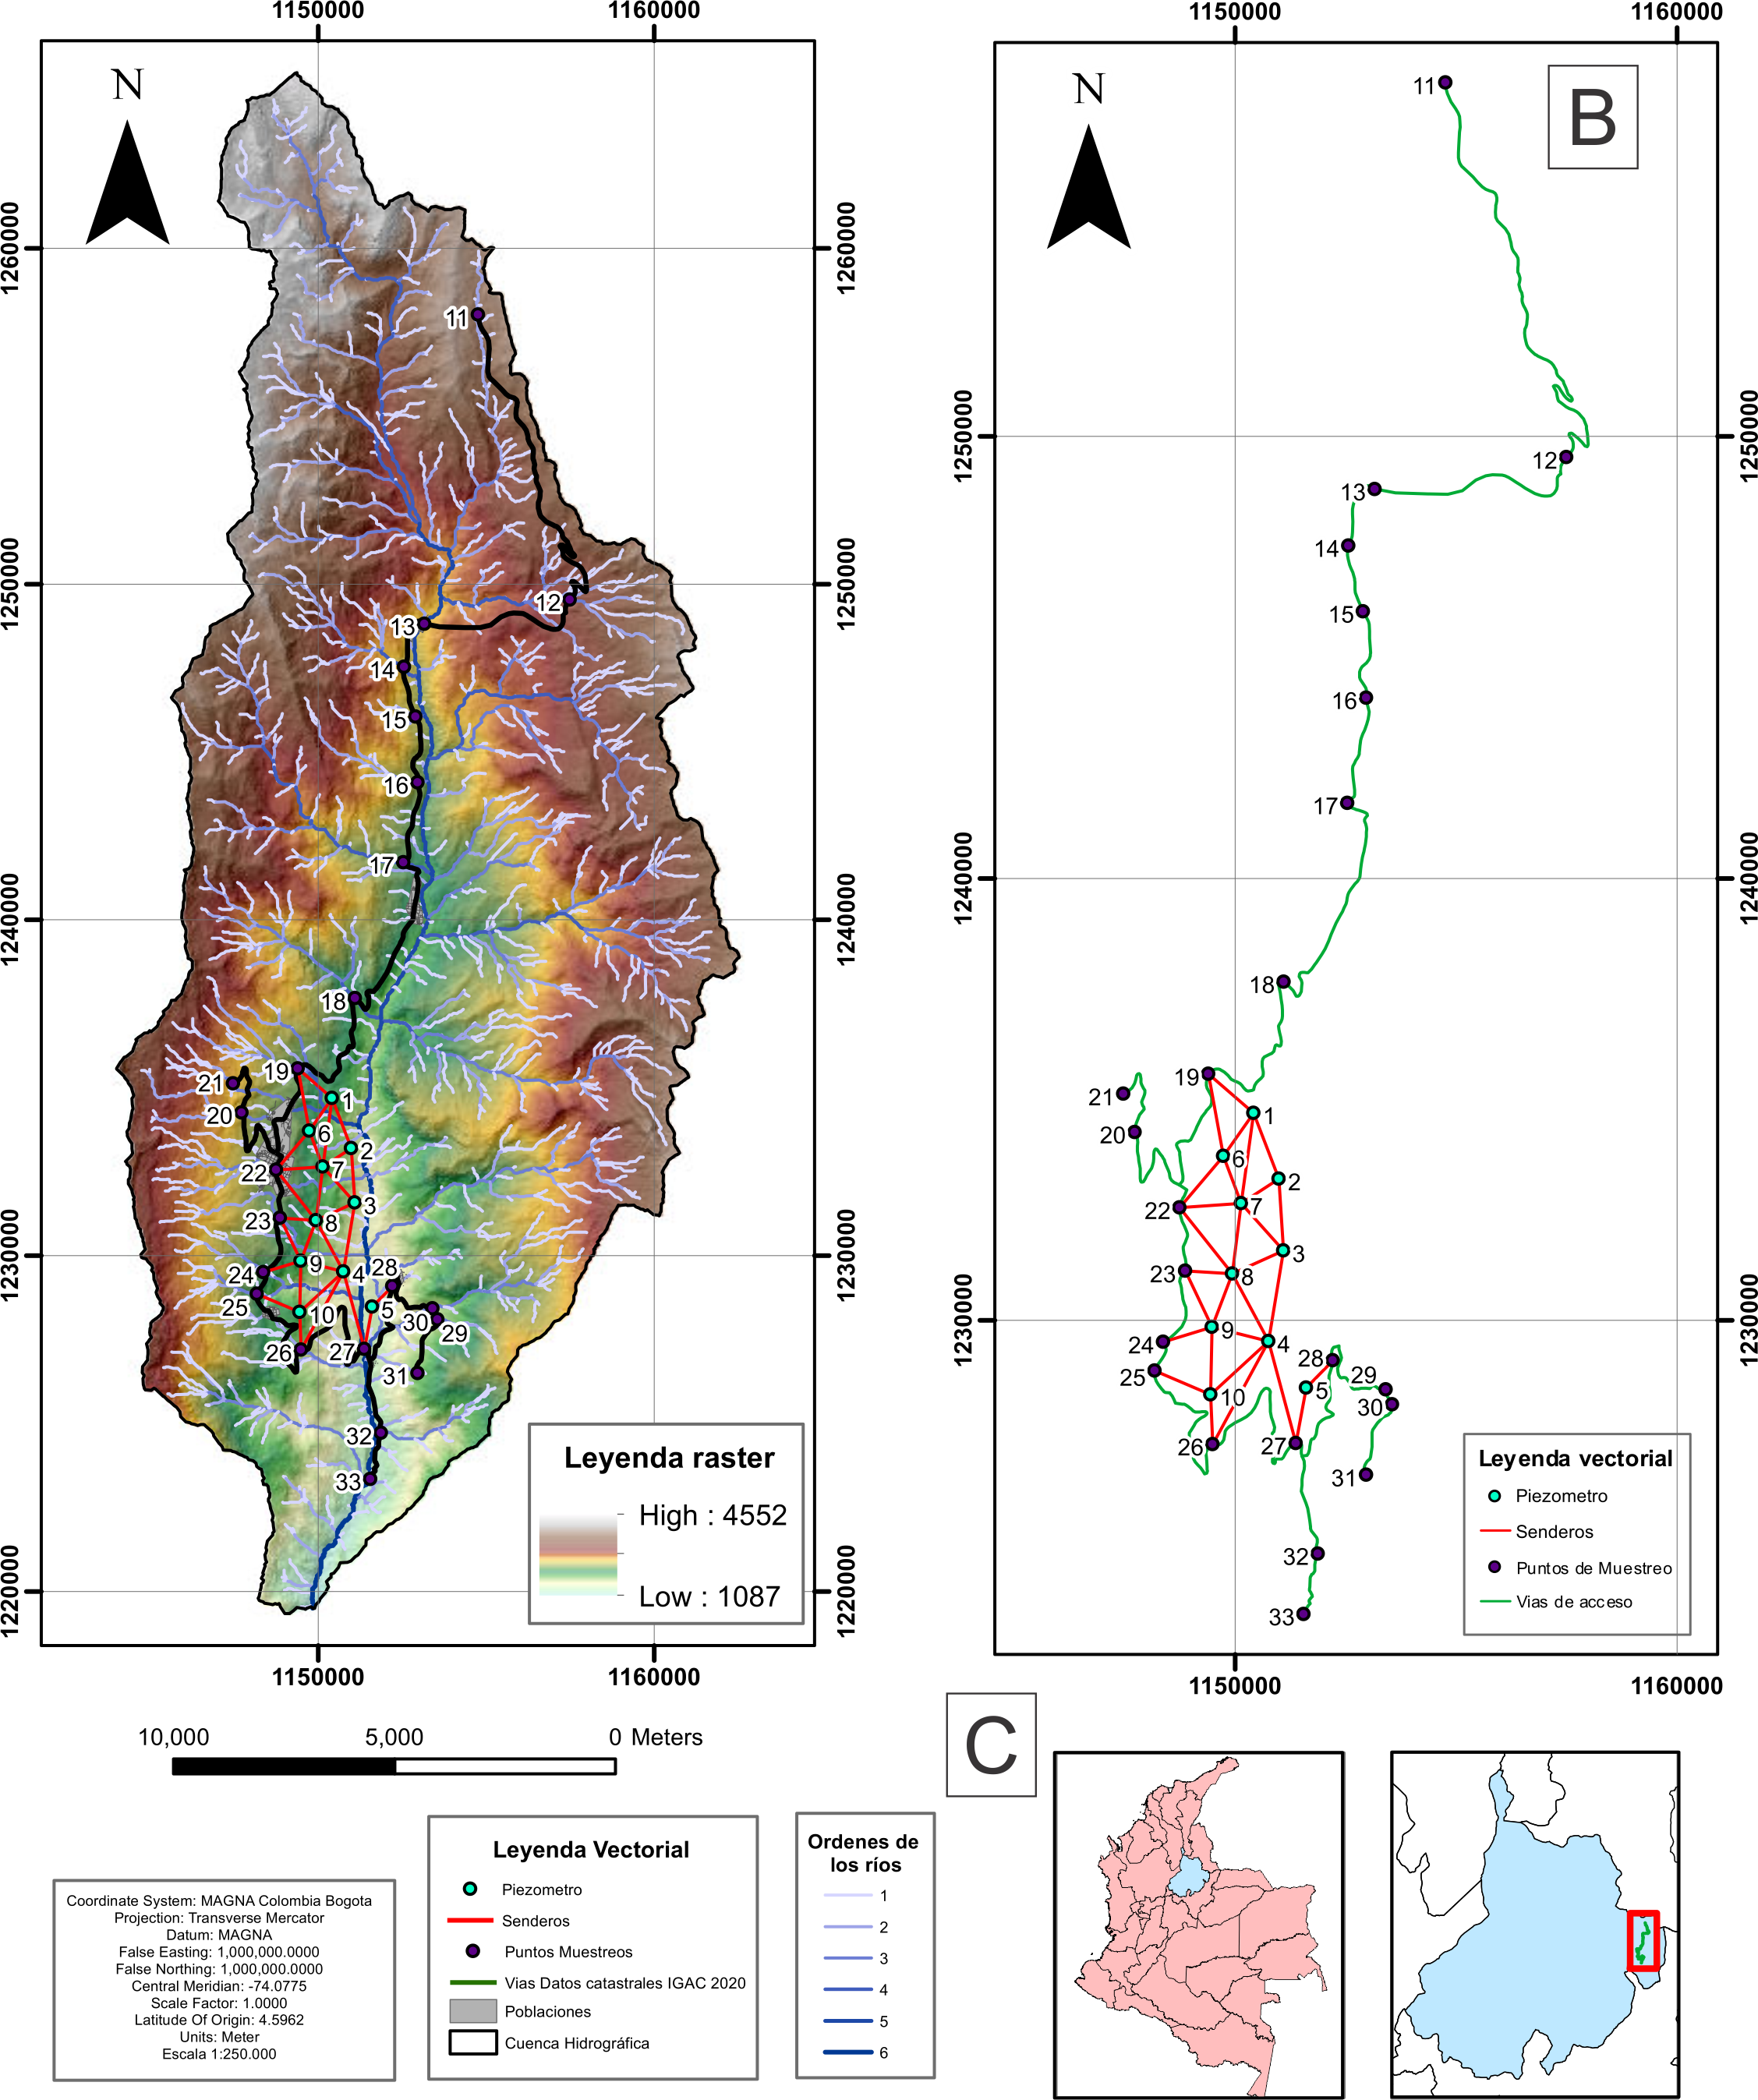

In [5]:
from IPython.display import Image
Image(filename='MapaGrafos.png', width=1000, height=1200)

In [6]:
import numpy as np
import csv 
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import HTML
from pandas import DataFrame

In [7]:
data = pd.read_csv('vertices.csv', delimiter =r";", encoding='latin1')
dvc = pd.DataFrame(data=data)
dvc.set_index("Punto_Muestreo", inplace = True)
dvc

,Tipo,Nombre
Punto_Muestreo,,
1,Piezometro,1
2,Piezometro,2
3,Piezometro,3
4,Piezometro,4
5,Piezometro,5
6,Piezometro,6
7,Piezometro,7
8,Piezometro,8
9,Piezometro,9


In [8]:
data = pd.read_csv('Aristas.csv', delimiter =r";", encoding='latin1')
dar = pd.DataFrame(data=data)
dar.set_index("Arista", inplace = True)
dar

,Vertice Inicio,Vertice Final,Distancia
Arista,,,
1,1,7,2.065
2,1,19,1.347
3,1,2,1.597
4,1,6,1.191
5,2,3,1.629
...,...,...,...
98,30,31,1.847
99,31,30,1.847
100,32,33,1.514


In [9]:
import matplotlib.pyplot as plt
import networkx as nx
import graphviz as pgv
Dar=nx.DiGraph()
for row in dar.iterrows():
    Dar.add_edge(row[1]["Vertice Inicio"],
                row[1]["Vertice Final"],
                distancia=row[1]["Distancia"])

In [10]:
Dar.nodes(data=True)

NodeDataView({1.0: {}, 7.0: {}, 19.0: {}, 2.0: {}, 6.0: {}, 3.0: {}, 8.0: {}, 4.0: {}, 10.0: {}, 9.0: {}, 27.0: {}, 26.0: {}, 5.0: {}, 28.0: {}, 22.0: {}, 23.0: {}, 24.0: {}, 25.0: {}, 11.0: {}, 12.0: {}, 13.0: {}, 14.0: {}, 15.0: {}, 16.0: {}, 17.0: {}, 18.0: {}, 20.0: {}, 21.0: {}, 29.0: {}, 32.0: {}, 30.0: {}, 31.0: {}, 33.0: {}})

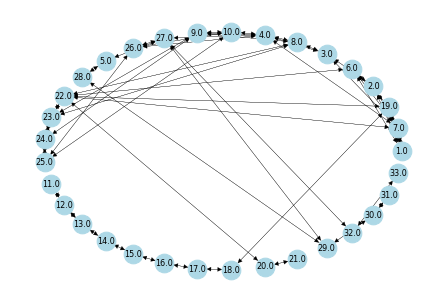

In [11]:
nx.draw_circular(Dar,
                node_color="lightblue",
                edge_color="black", 
                font_size=8, 
                width=0.25, 
                with_labels=True, 
                node_size=350
)

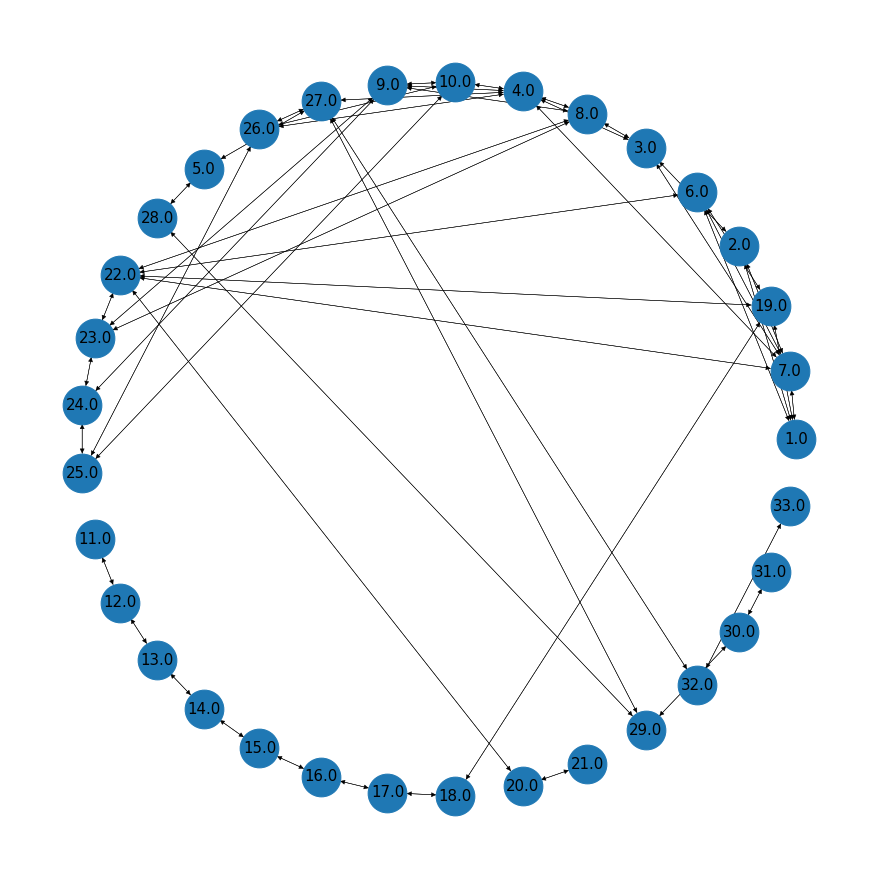

In [12]:
plt.figure(3,figsize=(12,12)) 
nx.draw_circular(Dar,with_labels=True,node_size=1500, font_size=15,width=0.5)
plt.show()

In [13]:
Dar.nodes(data=True)

NodeDataView({1.0: {}, 7.0: {}, 19.0: {}, 2.0: {}, 6.0: {}, 3.0: {}, 8.0: {}, 4.0: {}, 10.0: {}, 9.0: {}, 27.0: {}, 26.0: {}, 5.0: {}, 28.0: {}, 22.0: {}, 23.0: {}, 24.0: {}, 25.0: {}, 11.0: {}, 12.0: {}, 13.0: {}, 14.0: {}, 15.0: {}, 16.0: {}, 17.0: {}, 18.0: {}, 20.0: {}, 21.0: {}, 29.0: {}, 32.0: {}, 30.0: {}, 31.0: {}, 33.0: {}})

# Para encontrar todos los posibles caminos entre dos vertices del grafo use el siguiente programa:

In [14]:
GR = {'1': ['7', '19', '2', '6'], '2': ['3', '1', '7'],'3': ['8', '4', '2', '7'],
        '4': ['10', '9', '3', '7', '27', '8', '26'],'5': ['27', '28'],
        '6': ['22', '19', '7', '1'],'7': ['4', '1', '22', '2', '3', '6'],
        '8': ['9', '23', '3', '22', '4'],'9': ['24', '4', '8', '23', '10'],
        '10': ['26', '25', '4', '9'],'11': ['12'],'12': ['13', '11'],
        '13': ['14', '12'],'14': ['13', '15'],'15': ['16', '14'],'16': ['17', '15'],
        '17': ['18', '16'],'18': ['19', '17'],'19': ['1', '6', '18', '22'],
        '20': ['21', '22'],'21': ['20'],'22': ['7', '8', '6', '23', '20', '19'],
        '23': ['8', '9', '22', '24'], '24': ['9', '23', '25'],'25': ['10', '24', '26'],
        '26': ['10', '4', '25', '27'],'27': ['4', '5', '26', '29', '32'],'28': ['5', '29'],
        '29': ['27', '28', '30'],'30': ['29', '31'],'31': ['30'], '32': ['33', '27'],
        '33': ['32']
     }        

In [15]:
def find_all_paths(graph, start, end, path=[],):
        path = path + [start]
        if start == end:
            return [path]
        if not graph.__contains__(start):
            return []
        paths = []
        for node in graph[start]:
            if node not in path:
                newpaths = find_all_paths(graph, node, end, path)
                for newpath in newpaths:
                    paths.append(newpath)                    
        return paths           

In [18]:
print(find_all_paths(GR, '33', '28'))
x=len(find_all_paths(GR, '33', '28'))
print("Numero de posibles caminos = %d" %x)

[['33', '32', '27', '5', '28'], ['33', '32', '27', '29', '28']]
Numero de posibles caminos = 2


# Implementacion del algoritmo de dijkstra para encontrar el camino mas corto entre dos puntos dados sin pasar por todos los verices

In [31]:
import heapq
import sys

class Graph:
    
    def __init__(self):
        self.vertices = {}
        
    def add_vertex(self, name, edges):
        self.vertices[name] = edges
    
    def shortest_path(self, start, finish):
        distances = {} # Distance from start to node
        previous = {}  # Previous node in optimal path from source
        nodes = [] # Priority queue of all nodes in Graph

        for vertex in self.vertices:
            if vertex == start: # Set root node as distance of 0
                distances[vertex] = 0
                heapq.heappush(nodes, [0, vertex])
            else:
                distances[vertex] = sys.maxsize
                heapq.heappush(nodes, [sys.maxsize, vertex])
            previous[vertex] = None
        
        while nodes:
            smallest = heapq.heappop(nodes)[1] # Vertex in nodes with smallest distance in distances
            if smallest == finish: # If the closest node is our target we're done so print the path
                path = []
                while previous[smallest]: # Traverse through nodes til we reach the root which is 0
                    path.append(smallest)
                    smallest = previous[smallest]
                return path
            if distances[smallest] == sys.maxsize: # All remaining vertices are inaccessible from source
                break
            
            for neighbor in self.vertices[smallest]: # Look at all the nodes that this vertex is attached to
                alt = distances[smallest] + self.vertices[smallest][neighbor] # Alternative path distance
                if alt < distances[neighbor]: # If there is a new shortest path update our priority queue (relax)
                    distances[neighbor] = alt
                    previous[neighbor] = smallest
                    for n in nodes:
                        if n[1] == neighbor:
                            n[0] = alt
                            break
                    heapq.heapify(nodes)
        return distances
        
    def __str__(self):
        return str(self.vertices)

In [49]:
if __name__ == '__main__':
    g = Graph()
    g.add_vertex('1', {'2': 1.597, '6': 1.191, '7': 2.065, '19': 1.347})
    g.add_vertex('2', {'1': 1.597, '3': 1.629, '7': 1.018})
    g.add_vertex('3', {'2': 1.629, '4': 2.073, '7': 1.437, '8': 1.268})
    g.add_vertex('4', {'3': 2.073, '8': 1.733, '9': 1.313, '10': 1.780, '26': 2.655, '27': 2.392})
    g.add_vertex('5', {'27': 1.274, '28': 0.858})
    g.add_vertex('6', {'1': 1.919, '7': 1.146, '19': 1.882, '22': 1.529})
    g.add_vertex('7', {'1': 2.065, '2': 1.018, '3': 1.437, '6': 1.146, '8': 1.605, '22': 1.390})
    g.add_vertex('8', {'3': 1.268, '4': 1.733, '7': 1.605, '9': 1.289, '22': 1.908, '23': 1.066})
    g.add_vertex('9', {'4': 1.313, '8': 1.289, '10': 1.526, '23': 1.411, '24': 1.157})
    g.add_vertex('10',{'4': 1.780, '9': 1.526, '25': 1.372, '26': 1.129})
    g.add_vertex('11',{'12': 11.791})
    g.add_vertex('12',{'11': 11.791, '13': 5.306})
    g.add_vertex('13',{'12': 5.306, '14': 1.613})
    g.add_vertex('14',{'13': 1.613, '15': 1.554})
    g.add_vertex('15',{'14': 1.554, '16': 2.106})
    g.add_vertex('16',{'15': 2.106, '17': 2.550})
    g.add_vertex('17',{'16': 2.550, '18': 5.719})
    g.add_vertex('18',{'17': 5.719, '19': 4.234})
    g.add_vertex('19',{'1': 1.347, '6': 1.882, '18': 4.234, '22': 3.603})
    g.add_vertex('20',{'21': 2.050, '22': 3.674})
    g.add_vertex('21',{'20': 2.050})
    g.add_vertex('22',{'6': 1.529, '7': 1.39, '8': 1.908, '19': 3.603, '20': 3.674, '23': 1.494})
    g.add_vertex('23',{'8': 1.066, '9': 1.411, '22': 1.494, '24': 1.885})
    g.add_vertex('24',{'9': 1.157, '23': 1.885, '25': 0.828})
    g.add_vertex('25',{'10': 1.372, '24': 0.828, '26': 4.181})
    g.add_vertex('26',{'4': 2.655, '10': 1.129, '25': 4.181, '27': 4.619})
    g.add_vertex('27',{'4': 2.392, '5': 1.274, '26': 4.619, '28': 3.074, '32': 2.737})
    g.add_vertex('28',{'5': 0.858,'27': 3.074, '29': 2.483})
    g.add_vertex('29',{'28': 2.483, '30': 0.371})
    g.add_vertex('30',{'29': 0.371, '31': 1.847})
    g.add_vertex('31',{'30': 1.847})
    g.add_vertex('32',{'27': 2.737, '33': 1.514})
    g.add_vertex('33',{'32': 1.514})
    #def shortest_path(self, start, finish):
    print("\nEl camino mas corto entre dos puntos dados presentes en el grafo, sin pasar todos los vertices seria: \n")
    print(g.shortest_path('31', '11'))


El camino mas corto entre dos puntos dados presentes en el grafo, sin pasar todos los vertices seria: 

['11', '12', '13', '14', '15', '16', '17', '18', '19', '6', '7', '8', '4', '27', '5', '28', '29', '30']


# Implementacion del Minimum SpanningTree (MST) para encontrar el camino mas corto en el grafo pasando por todos los nodos 

In [52]:
from collections import defaultdict
import heapq


def create_spanning_tree(graph, starting_vertex):
    mst = defaultdict(set)
    visited = set([starting_vertex])
    edges = [
        (cost, starting_vertex, to)
        for to, cost in graph[starting_vertex].items()
    ]
    heapq.heapify(edges)

    while edges:
        cost, frm, to = heapq.heappop(edges)
        if to not in visited:
            visited.add(to)
            mst[frm].add(to)
            for to_next, cost in graph[to].items():
                if to_next not in visited:
                    heapq.heappush(edges, (cost, to, to_next))

    return mst

In [55]:
example_graph = {
   '1' :  {'2': 1.597, '6': 1.191, '7': 2.065, '19': 1.347},
   '2' :  {'1': 1.597, '3': 1.629, '7': 1.018},
   '3' :  {'2': 1.629, '4': 2.073, '7': 1.437, '8': 1.268},
   '4' :  {'3': 2.073, '8': 1.733, '9': 1.313, '10': 1.780, '26': 2.655, '27': 2.392},
   '5' :  {'27': 1.274, '28': 0.858},
   '6' :  {'1': 1.919, '7': 1.146, '19': 1.882, '22': 1.529},
   '7' :  {'1': 2.065, '2': 1.018, '3': 1.437, '6': 1.146, '8': 1.605, '22': 1.390},
   '8' :  {'3': 1.268, '4': 1.733, '7': 1.605, '9': 1.289, '22': 1.908, '23': 1.066},
   '9' :  {'4': 1.313, '8': 1.289, '10': 1.526, '23': 1.411, '24': 1.157},
   '10' : {'4': 1.780, '9': 1.526, '25': 1.372, '26': 1.129},
   '11' : {'12': 11.791},
   '12' : {'11': 11.791, '13': 5.306},
   '13' : {'12': 5.306, '14': 1.613},
   '14' : {'13': 1.613, '15': 1.554},
   '15' : {'14': 1.554, '16': 2.106},
   '16' : {'15': 2.106, '17': 2.550},
   '17' : {'16': 2.550, '18': 5.719},
   '18' : {'17': 5.719, '19': 4.234},
   '19' : {'1': 1.347, '6': 1.882, '18': 4.234, '22': 3.603},
   '20' : {'21': 2.050, '22': 3.674},
   '21' : {'20': 2.050},
   '22' : {'6': 1.529, '7': 1.39, '8': 1.908, '19': 3.603, '20': 3.674, '23': 1.494},
   '23' : {'8': 1.066, '9': 1.411, '22': 1.494, '24': 1.885},
   '24' : {'9': 1.157, '23': 1.885, '25': 0.828},
   '25' : {'10': 1.372, '24': 0.828, '26': 4.181},
   '26' : {'4': 2.655, '10': 1.129, '25': 4.181, '27': 4.619},
   '27' : {'4': 2.392, '5': 1.274, '26': 4.619, '28': 3.074, '32': 2.737},
   '28' : {'5': 0.858,'27': 3.074, '29': 2.483},
   '29' : {'28': 2.483, '30': 0.371},
   '30' : {'29': 0.371, '31': 1.847},
   '31' : {'30': 1.847},
   '32' : {'27': 2.737, '33': 1.514},
   '33' : {'32': 1.514}, 
}

dict(create_spanning_tree(example_graph, '31'))

{'31': {'30'},
 '30': {'29'},
 '29': {'28'},
 '28': {'5'},
 '5': {'27'},
 '27': {'32', '4'},
 '4': {'9'},
 '9': {'24', '8'},
 '24': {'25'},
 '8': {'23', '3'},
 '25': {'10'},
 '10': {'26'},
 '3': {'7'},
 '7': {'2', '22', '6'},
 '2': {'1'},
 '1': {'19'},
 '32': {'33'},
 '22': {'20'},
 '20': {'21'},
 '19': {'18'},
 '18': {'17'},
 '17': {'16'},
 '16': {'15'},
 '15': {'14'},
 '14': {'13'},
 '13': {'12'},
 '12': {'11'}}

# Implementacion del Prim's Algorithm para encontrar el camino mas corto en el grafo pasando por todos los nodos 

In [153]:
# Prim's Algorithm in Python


INF = 9999999
# number of vertices in graph
V = 33
# create a 2d array of size 5x5
# for adjacency matrix to represent graph
G = [[0,1.597,0,0,0,1.191,2.065,0,0,0,0,0,0,0,0,0,0,0,1.347,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                    [1.597,0,1.629,0,0,0,1.018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                    [0,1.629,0,2.073,0,0,1.437,1.268,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                    [0,0,2.073,0,0,0,0,1.733,1.313,1.780,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.655,2.392,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.274,0.858,0,0,0,0,0],
                    [1.191,0,0,0,0,0,1.146,0,0,0,0,0,0,0,0,0,0,0,1.882,0,0,1.529,0,0,0,0,0,0,0,0,0,0,0],
                    [2.065,1.018,1.437,0,0,1.146,0,1.605,0,0,0,0,0,0,0,0,0,0,0,0,0,1.390,0,0,0,0,0,0,0,0,0,0,0],
                    [0,0,1.268,1.733,0,0,1.605,0,1.289,0,0,0,0,0,0,0,0,0,0,0,0,1.908,1.066,0,0,0,0,0,0,0,0,0,0],
                    [0,0,0,1.313,0,0,0,1.289,0,1.526,0,0,0,0,0,0,0,0,0,0,0,0,1.411,1.157,0,0,0,0,0,0,0,0,0],
                    [0,0,0,1.780,0,0,0,0,1.526,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.372,1.129,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0,0,0,0,11.791,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0,0,0,11.791,0,5.306,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0,0,0,0,5.306,0,1.613,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0,0,0,0,0,1.613,0,1.554,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0,0,0,0,0,0,1.554,0,2.106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.106,0,2.550,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.550,0,5.719,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.719,0,4.234,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                    [1.347,0,0,0,0,1.882,0,0,0,0,0,0,0,0,0,0,0,4.234,0,0,0,3.603,0,0,0,0,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.050,3.674,0,0,0,0,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.050,0,0,0,0,0,0,0,0,0,0,0,0,0],
                    [0,0,0,0,0,1.529,1.390,1.908,0,0,0,0,0,0,0,0,0,0,3.603,3.674,0,0,1.494,0,0,0,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,1.066,1.411,0,0,0,0,0,0,0,0,0,0,0,0,1.494,0,1.885,0,0,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0,1.157,0,0,0,0,0,0,0,0,0,0,0,0,0,1.885,0,0.828,0,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0,0,1.372,0,0,0,0,0,0,0,0,0,0,0,0,0,0.828,0,4.181,0,0,0,0,0,0,0],
                    [0,0,0,2.655,0,0,0,0,0,1.129,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.181,0,4.619,0,0,0,0,0,0],
                    [0,0,0,2.392,1.274,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.619,0,0,3.074,0,0,2.737,0],
                    [0,0,0,0,0.858,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.483,0,0,0,0],
                    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.074,2.483,0,0.371,0,0,0],
                    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.371,0,1.847,0,0],
                    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.847,0,0,0],
                    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.737,0,0,0,0,0,1.514],
                    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.514,0]]
# create a array to track selected vertex
# selected will become true otherwise false
selected = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,]
# set number of edge to 0
no_edge = 1
# the number of egde in minimum spanning tree will be
# always less than(V - 1), where V is number of vertices in
# graph
# choose 0th vertex and make it true
selected[30] = True
# print for edge and weight
print("Edge : Weight\n")
while (no_edge < V - 1):
    # For every vertex in the set S, find the all adjacent vertices
    #, calculate the distance from the vertex selected at step 1.
    # if the vertex is already in the set S, discard it otherwise
    # choose another vertex nearest to selected vertex  at step 1.
    minimum = INF
    x = 1
    y = 1
    for i in range(V):
        if selected[i]:
            for j in range(V):
                if ((not selected[j]) and G[i][j]):  
                    # not in selected and there is an edge
                    if minimum > G[i][j]:
                        minimum = G[i][j]
                        x = i
                        y = j
    print(str(x) + "-" + str(y) + ":" + str(G[x][y]))
    selected[y] = True
    no_edge += 1

Edge : Weight

30-29:1.847
29-28:0.371
28-27:2.483
27-4:0.858
4-26:1.274
26-3:2.392
3-8:1.313
8-23:1.157
23-24:0.828
8-7:1.289
7-22:1.066
7-2:1.268
24-9:1.372
9-25:1.129
2-6:1.437
6-1:1.018
6-5:1.146
5-0:1.191
0-18:1.347
6-21:1.39
26-31:2.737
31-32:1.514
21-19:3.674
19-20:2.05
18-17:4.234
17-16:5.719
16-15:2.55
15-14:2.106
14-13:1.554
13-12:1.613
12-11:5.306


# Implementacion del Kruskal's algorithm para encontrar el camino mas corto en el grafo pasando por todos los nodos 

In [149]:
# Kruskal's algorithm in Python
class Graph:
    def __init__(self, vertices):
        self.V = vertices
        self.graph = []

    def add_edge(self, u, v, w):
        self.graph.append([u, v, w])

    # Search function

    def find(self, parent, i):
        if parent[i] == i:
            return i
        return self.find(parent, parent[i])

    def apply_union(self, parent, rank, x, y):
        xroot = self.find(parent, x)
        yroot = self.find(parent, y)
        if rank[xroot] < rank[yroot]:
            parent[xroot] = yroot
        elif rank[xroot] > rank[yroot]:
            parent[yroot] = xroot
        else:
            parent[yroot] = xroot
            rank[xroot] += 1

    #  Applying Kruskal algorithm
    def kruskal_algo(self):
        result = []
        i, e = 0, 0
        self.graph = sorted(self.graph, key=lambda item: item[2])
        parent = []
        rank = []
        for node in range(self.V):
            parent.append(node)
            rank.append(0)
        while e < self.V - 1:
            u, v, w = self.graph[i]
            i = i + 1
            x = self.find(parent, u)
            y = self.find(parent, v)
            if x != y:
                e = e + 1
                result.append([u, v, w])
                self.apply_union(parent, rank, x, y)
        for u, v, weight in result:
            print("%d - %d: %.2f" % (u, v, weight))
            
g = Graph(33)
g.add_edge(0, 1, 1.597)
g.add_edge(0, 5, 1.191)
g.add_edge(0, 6, 2.065)
g.add_edge(0, 18, 1.347)
g.add_edge(1, 0, 1.597)
g.add_edge(1, 2, 1.629)
g.add_edge(1, 6, 1.018)
g.add_edge(2, 1, 1.629)
g.add_edge(2, 3, 2.073)
g.add_edge(2, 6, 1.437)
g.add_edge(2, 7, 1.268)
g.add_edge(3, 2, 2.073)
g.add_edge(3, 6, 1.605)
g.add_edge(3, 7, 1.733)
g.add_edge(3, 8, 1.313)
g.add_edge(3, 9, 1.780)
g.add_edge(3, 25, 2.655)
g.add_edge(3, 26, 2.392)
g.add_edge(4, 26, 1.274)
g.add_edge(4, 27, 0.858)
g.add_edge(5, 0, 1.191)
g.add_edge(5, 6, 1.146)
g.add_edge(5, 18, 1.882)
g.add_edge(5, 21, 1.529)
g.add_edge(6, 0, 2.065)
g.add_edge(6, 1, 1.018)
g.add_edge(6, 2, 1.437)
g.add_edge(6, 3, 1.605)
g.add_edge(6, 5, 1.146)
g.add_edge(6, 21, 1.390)
g.add_edge(7, 2, 1.268)
g.add_edge(7, 3, 1.733)
g.add_edge(7, 8, 1.289)
g.add_edge(7, 21, 1.908)
g.add_edge(7, 22, 1.066)
g.add_edge(8, 3, 1.313)
g.add_edge(8, 7, 1.289)
g.add_edge(8, 9, 1.526)
g.add_edge(8, 22, 1.411)
g.add_edge(8, 23, 1.157)
g.add_edge(9, 3, 1.780)
g.add_edge(9, 8, 1.526)
g.add_edge(9, 24, 1.372)
g.add_edge(9, 25, 1.129)
g.add_edge(10, 11, 11.791)
g.add_edge(11, 10, 11.791)
g.add_edge(11, 12, 5.306)
g.add_edge(12, 11, 5.306)
g.add_edge(12, 13, 1.613)
g.add_edge(13, 12, 1.613)
g.add_edge(13, 14, 1.554)
g.add_edge(14, 13, 1.554)
g.add_edge(14, 15, 2.106)
g.add_edge(15, 14, 2.106)
g.add_edge(15, 16, 2.550)
g.add_edge(16, 15, 2.550)
g.add_edge(16, 17, 5.719)
g.add_edge(17, 16, 5.719)
g.add_edge(17, 18, 4.234)
g.add_edge(18, 0, 1.347)
g.add_edge(18, 5, 1.882)
g.add_edge(18, 17, 4.234)
g.add_edge(18, 21, 3.603)
g.add_edge(19, 20, 2.050)
g.add_edge(19, 21, 3.674)
g.add_edge(20, 19, 2.050)
g.add_edge(21, 5, 1.529)
g.add_edge(21, 6, 1.390)
g.add_edge(21, 7, 1.908)
g.add_edge(21, 18, 3.603)
g.add_edge(21, 19, 3.674)
g.add_edge(21, 22, 1.494)
g.add_edge(22, 7, 1.066)
g.add_edge(22, 8, 1.411)
g.add_edge(22, 21, 1.494)
g.add_edge(22, 23, 1.885)
g.add_edge(23, 8, 1.157)
g.add_edge(23, 22, 1.885)
g.add_edge(23, 24, 0.828)
g.add_edge(24, 9, 1.372)
g.add_edge(24, 23, 0.828)
g.add_edge(24, 25, 4.181)
g.add_edge(25, 3, 2.655)
g.add_edge(25, 9, 1.129)
g.add_edge(25, 24, 4.181)
g.add_edge(25, 26, 4.619)
g.add_edge(26, 3, 2.392)
g.add_edge(26, 4, 1.274)
g.add_edge(26, 25, 4.619)
g.add_edge(26, 28, 3.074)
g.add_edge(26, 31, 2.737)
g.add_edge(27, 4, 0.858)
g.add_edge(27, 28, 2.483)
g.add_edge(28, 26, 3.074)
g.add_edge(28, 27, 2.483)
g.add_edge(28, 29, 0.371)
g.add_edge(29, 28, 0.371)
g.add_edge(29, 30, 1.847)
g.add_edge(30, 29, 1.847)
g.add_edge(31, 26, 2.737)
g.add_edge(31, 32, 1.514)
g.add_edge(32, 31, 1.514)
g.kruskal_algo()  

28 - 29: 0.37
23 - 24: 0.83
4 - 27: 0.86
1 - 6: 1.02
7 - 22: 1.07
9 - 25: 1.13
5 - 6: 1.15
8 - 23: 1.16
0 - 5: 1.19
2 - 7: 1.27
4 - 26: 1.27
7 - 8: 1.29
3 - 8: 1.31
0 - 18: 1.35
9 - 24: 1.37
6 - 21: 1.39
2 - 6: 1.44
31 - 32: 1.51
13 - 14: 1.55
12 - 13: 1.61
29 - 30: 1.85
19 - 20: 2.05
14 - 15: 2.11
3 - 26: 2.39
27 - 28: 2.48
15 - 16: 2.55
26 - 31: 2.74
19 - 21: 3.67
17 - 18: 4.23
11 - 12: 5.31
16 - 17: 5.72
10 - 11: 11.79


In [63]:
import networkx as nx
GRPRY = {'1':[{'2':'1.597'},{'6':'1.191'},{'7':'2.065'},{'19':'1.347'}],
        '2':[{'3':'1.629'},{'7':'1.018'}],
        '3':[{'4':'2.073'},{'7':'1.437'},{'8':'1.268'}],
        '4':[{'7':'1.605'},{'8':'1.733'},{'9':'1.313'},{'10':'1.780'},{'26':'2.655'},{'27':'2.392'}],
        '5':[{'27':'1.274'},{'28':'0.858'}],
        '6':[{'7':'1.146'},{'19':'1.882'},{'22':'1.529'}],
        '7':[{'22':'1.390'}],
        '8':[{'9':'1.289'},{'22':'1.908'},{'23':'1.066'}],
        '9':[{'10':'1.526'},{'23':'1.411'},{'24':'1.157'}],
        '10':[{'25':'1.372'},{'26':'1.129'}],
        '11':[{'12':'11.791'}],
        '12':[{'13':'5.306'}],
        '13':[{'14':'1.613'}],
        '14':[{'15':'1.554'}],
        '15':[{'16':'2.106'}],
        '16':[{'17':'2.550'}],
        '17':[{'18':'5.719'}],
        '18':[{'19':'4.234'}],
        '19':[{'22':'3.603'}],
        '20':[{'21':'2.050'},{'22':'3.674'}],
        '22':[{'23':'1.494'}],
        '23':[{'24':'1.885'}],
        '24':[{'25':'0.828'}],
        '25':[{'26':'4.181'}],
        '26':[{'27':'4.619'}],
        '27':[{'29':'3.074'},{'32':'2.737'}],
        '28':[{'29':'2.483'}],
        '29':[{'30':'0.371'}],
        '30':[{'31':'1.847'}],
        '32':[{'33':'1.514'}],
        }

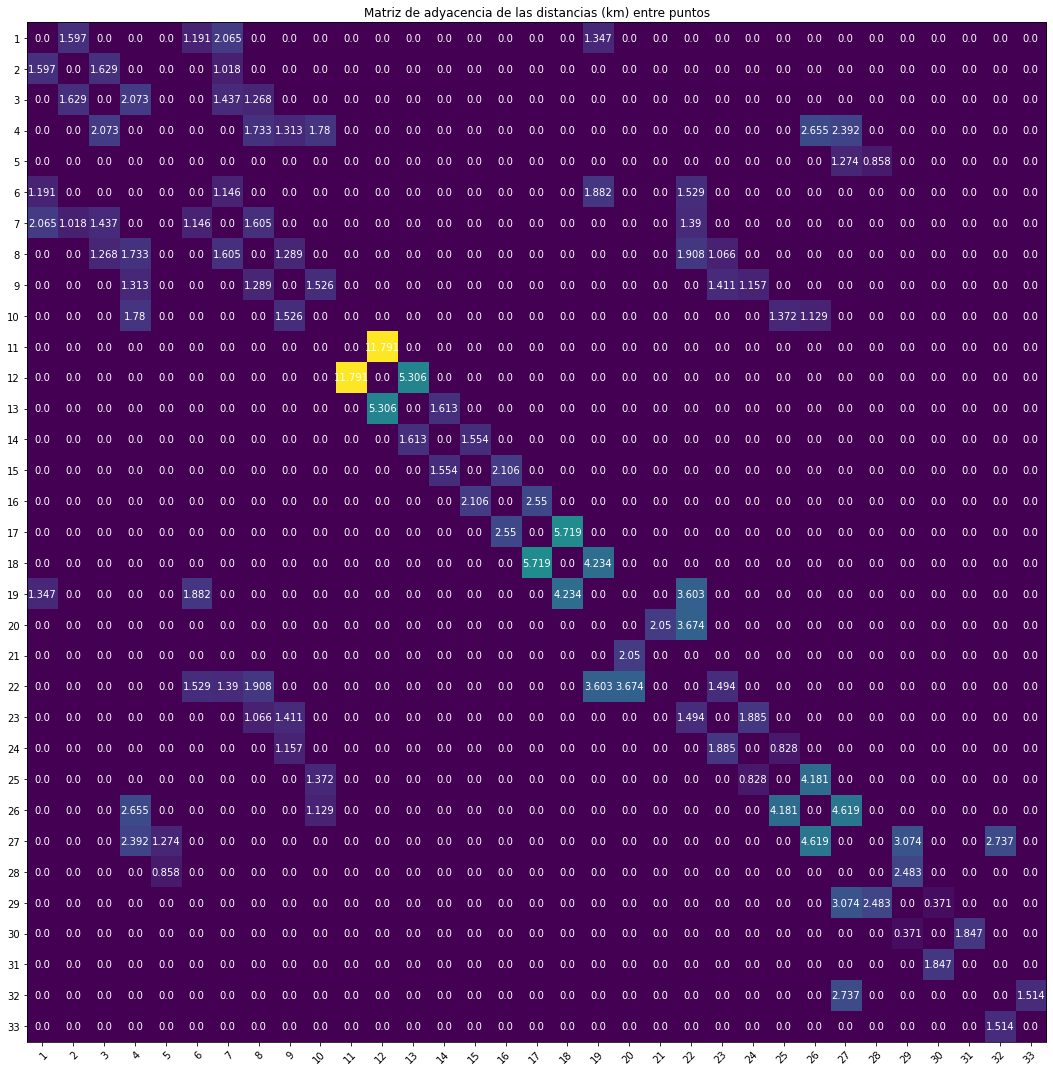

In [150]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

ejeX = ["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21","22","23","24","25","26","27","28","29","30","31","32","33"]
ejeY = ["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21","22","23","24","25","26","27","28","29","30","31","32","33"]

Grafo = np.array([[0,1.597,0,0,0,1.191,2.065,0,0,0,0,0,0,0,0,0,0,0,1.347,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                    [1.597,0,1.629,0,0,0,1.018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                    [0,1.629,0,2.073,0,0,1.437,1.268,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                    [0,0,2.073,0,0,0,0,1.733,1.313,1.780,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.655,2.392,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.274,0.858,0,0,0,0,0],
                    [1.191,0,0,0,0,0,1.146,0,0,0,0,0,0,0,0,0,0,0,1.882,0,0,1.529,0,0,0,0,0,0,0,0,0,0,0],
                    [2.065,1.018,1.437,0,0,1.146,0,1.605,0,0,0,0,0,0,0,0,0,0,0,0,0,1.390,0,0,0,0,0,0,0,0,0,0,0],
                    [0,0,1.268,1.733,0,0,1.605,0,1.289,0,0,0,0,0,0,0,0,0,0,0,0,1.908,1.066,0,0,0,0,0,0,0,0,0,0],
                    [0,0,0,1.313,0,0,0,1.289,0,1.526,0,0,0,0,0,0,0,0,0,0,0,0,1.411,1.157,0,0,0,0,0,0,0,0,0],
                    [0,0,0,1.780,0,0,0,0,1.526,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.372,1.129,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0,0,0,0,11.791,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0,0,0,11.791,0,5.306,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0,0,0,0,5.306,0,1.613,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0,0,0,0,0,1.613,0,1.554,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0,0,0,0,0,0,1.554,0,2.106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.106,0,2.550,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.550,0,5.719,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.719,0,4.234,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                    [1.347,0,0,0,0,1.882,0,0,0,0,0,0,0,0,0,0,0,4.234,0,0,0,3.603,0,0,0,0,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.050,3.674,0,0,0,0,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.050,0,0,0,0,0,0,0,0,0,0,0,0,0],
                    [0,0,0,0,0,1.529,1.390,1.908,0,0,0,0,0,0,0,0,0,0,3.603,3.674,0,0,1.494,0,0,0,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,1.066,1.411,0,0,0,0,0,0,0,0,0,0,0,0,1.494,0,1.885,0,0,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0,1.157,0,0,0,0,0,0,0,0,0,0,0,0,0,1.885,0,0.828,0,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0,0,1.372,0,0,0,0,0,0,0,0,0,0,0,0,0,0.828,0,4.181,0,0,0,0,0,0,0],
                    [0,0,0,2.655,0,0,0,0,0,1.129,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.181,0,4.619,0,0,0,0,0,0],
                    [0,0,0,2.392,1.274,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.619,0,0,3.074,0,0,2.737,0],
                    [0,0,0,0,0.858,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.483,0,0,0,0],
                    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.074,2.483,0,0.371,0,0,0],
                    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.371,0,1.847,0,0],
                    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.847,0,0,0],
                    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.737,0,0,0,0,0,1.514],
                    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.514,0]])

fig, ax = plt.subplots()
im = ax.imshow(Grafo)
ax.set_xticks(np.arange(len(ejeY)))
ax.set_yticks(np.arange(len(ejeX)))
ax.set_xticklabels(ejeY)
ax.set_yticklabels(ejeX)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
for i in range(len(ejeX)):
    for j in range(len(ejeY)):
        text = ax.text(j, i, Grafo[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Matriz de adyacencia de las distancias (km) entre puntos")
fig.tight_layout()
plt.show()
plt.rcParams["figure.figsize"] = (15,15)

In [151]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    if not ax:
        ax = plt.gca()
    im = ax.imshow(data, **kwargs)
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")
    for edge, spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=5)
    ax.tick_params(which="minor", bottom=False, left=False)
    return im, cbar

def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=["white", "white"],
                     threshold=None, **textkw):
    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

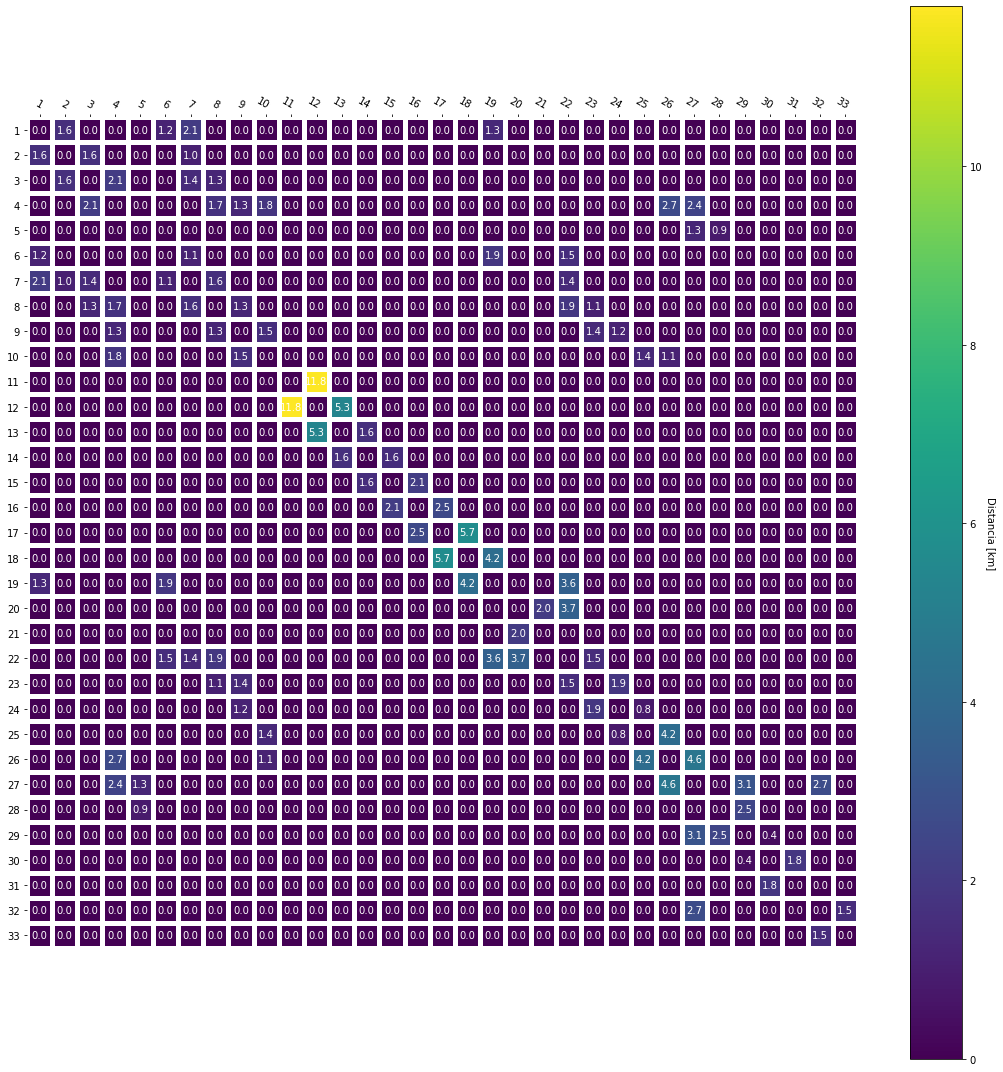

In [152]:
fig, ax = plt.subplots()
im, cbar = heatmap(Grafo, ejeX, ejeY, ax=ax,
                   cmap="viridis", cbarlabel="Distancia [km]")
texts = annotate_heatmap(im, valfmt="{x:.1f}")
fig.tight_layout()
plt.show()
plt.rcParams["figure.figsize"] = (15,15)
